### Quick Start

The `ssms` package serves two purposes. 

1. Easy access to *fast simulators of sequential sampling models*
   
2. Support infrastructure to construct training data for various approaches to likelihood / posterior amortization

We provide two minimal examples here to illustrate how to use each of the two capabilities.

Let's start with *installing* the `ssms` package.

You can do so by typing,

`pip install git+https://github.com/AlexanderFengler/ssm_simulators`

in your terminal.


In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import ssms

#### Using the Simulators

Let's start with using the basic simulators. 
You access the main simulators through the  `ssms.basic_simulators.simulator` function.

To get an idea about the models included in `ssms`, use the `config` module.
The central dictionary with metadata about included models sits in `ssms.config.model_config`. 

In [2]:
# Check included models
list(ssms.config.model_config.keys())[:12]

['ddm',
 'ddm_legacy',
 'angle',
 'weibull',
 'levy',
 'levy_angle',
 'full_ddm',
 'gamma_drift',
 'gamma_drift_angle',
 'ds_conflict_drift',
 'ds_conflict_drift_angle',
 'ornstein']

In [3]:
# Take an example config for a given model
ssms.config.model_config["ds_conflict_drift"]

{'name': 'ds_conflict_drift',
 'params': ['a',
  'z',
  't',
  'tinit',
  'dinit',
  'tslope',
  'dslope',
  'tfixedp',
  'tcoh',
  'dcoh'],
 'param_bounds': [[0.3, 0.1, 0.001, 0, 0, 0.01, 0.01, 0, -1.0, -1.0],
  [3.0, 0.9, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 1.0]],
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'drift_fun': <function ssms.basic_simulators.drift_functions.ds_conflict_drift(t=array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00]), init_p_t=0, init_p_d=0, slope_t=1, slope_d=1, fixed_p_t=1, coherence_t=1.5, coherence_d=1.5)>,
 'n_params': 10,
 'default_params': [2.0, 0.5, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 0.5, -0.5],
 'hddm_include': ['a',
  'z',
  't',
  'tinit',
  'dinit',
  'tslope',
  'dslope',
  'tfixedp',
  'tcoh',
  'dcoh'],
 'nchoices': 2}

**Note:**
The usual structure of these models includes,

- Parameter names (`'params'`)
- Bounds on the parameters (`'param_bounds'`)
- A function that defines a boundary for the respective model (`'boundary'`)
- The number of parameters (`'n_params'`)
- Defaults for the parameters (`'default_params'`)
- The number of choices the process can produce (`'nchoices'`)

The `'hddm_include'` key concerns information useful for integration with the [hddm](https://github.com/hddm-devs/hddm) python package, which facilitates hierarchical bayesian inference for sequential sampling models. It is not important for the present tutorial.

In [55]:
from ssms.basic_simulators import simulator

theta = ssms.config.model_config["ds_conflict_drift"]["default_params"]
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("tfixedp")] = 5
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("a")] = 1.5
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("tinit")] = 5
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("dinit")] = 0
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("tcoh")] = 1
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("dcoh")] = 0
theta[ssms.config.model_config["ds_conflict_drift"]["params"].index("t")] = 0
sim_out = simulator(model="ds_conflict_drift", theta=theta, n_samples=1000)

In [56]:
from ssms.basic_simulators import simulator

theta = ssms.config.model_config["ddm"]["default_params"]
theta[ssms.config.model_config["ddm"]["params"].index("v")] = 5
theta[ssms.config.model_config["ddm"]["params"].index("a")] = 1.5
theta[ssms.config.model_config["ddm"]["params"].index("t")] = 0
sim_out_base = simulator(model="ddm", theta=theta, n_samples=1000)

In [57]:
ssms.config.model_config["ds_conflict_drift"]["params"]

['a',
 'z',
 't',
 'tinit',
 'dinit',
 'tslope',
 'dslope',
 'tfixedp',
 'tcoh',
 'dcoh']

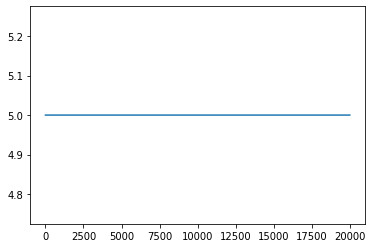

In [58]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib

# import seaborn as sns
plt.plot(sim_out["metadata"]["drift"])

(-3.0, 3.0)

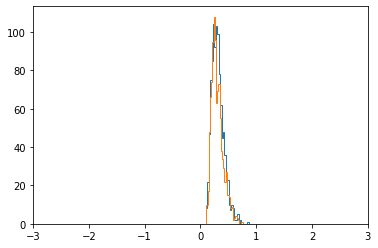

In [59]:
plt.hist(sim_out["rts"] * sim_out["choices"], bins=30, histtype="step")
plt.hist(sim_out_base["rts"] * sim_out_base["choices"], bins=30, histtype="step")

plt.xlim((-3, 3))

The output of the simulator is a `dictionary` with three elements.

1. `rts` (array)
2. `choices` (array)
3. `metadata` (dictionary)

The `metadata` includes the named parameters, simulator settings, and more.

#### 

In [60]:
# TEST STANDARD TRAINING DATA GENERATOR
# my_data_config = config.data_generator_config['lan']['cnn']
my_data_config = ssms.config.data_generator_config["lan"]["mlp"]
my_data_config["dgp_list"] = "tradeoff_no_bias"
my_data_config["n_parameter_sets"] = 100
my_data_config["n_samples"] = 1000

In [62]:
my_model_config = ssms.config.model_config["tradeoff_no_bias"]

In [63]:
my_dataset_generator = ssms.dataset_generators.data_generator(
    generator_config=my_data_config, model_config=my_model_config
)

n_cpus used:  6
checking:  data/lan_mlp/


In [64]:
x = my_dataset_generator.generate_data_training_uniform(save=False)

simulation round: 1  of 10
simulation round: 2  of 10
simulation round: 3  of 10
simulation round: 4  of 10
simulation round: 5  of 10
simulation round: 6  of 10
simulation round: 7  of 10
simulation round: 8  of 10
simulation round: 9  of 10
simulation round: 10  of 10


In [65]:
x

{'data': array([[-0.38610438, -1.3320698 ,  1.8300703 , ...,  0.407555  ,
          2.104763  ,  0.        ],
        [-0.38610438, -1.3320698 ,  1.8300703 , ...,  0.407555  ,
          2.69727   ,  0.        ],
        [-0.38610438, -1.3320698 ,  1.8300703 , ...,  0.407555  ,
          1.2684623 ,  0.        ],
        ...,
        [-0.39633387,  0.18759471, -1.0542347 , ...,  0.20308132,
         -0.32188985,  0.        ],
        [-0.39633387,  0.18759471, -1.0542347 , ...,  0.20308132,
         -0.06727885,  3.        ],
        [-0.39633387,  0.18759471, -1.0542347 , ...,  0.20308132,
         -0.74756646,  3.        ]], dtype=float32),
 'labels': array([ -1.5323812 ,  -2.2718892 ,  -0.79332405, ..., -66.77497   ,
        -66.77497   , -66.77497   ], dtype=float32),
 'generator_config': {'output_folder': 'data/lan_mlp/',
  'dgp_list': 'tradeoff_no_bias',
  'nbins': 0,
  'n_samples': 1000,
  'n_parameter_sets': 100,
  'n_parameter_sets_rejected': 100,
  'n_training_samples_by_param

In [3]:
# TEST NESTED MODEL TRAINING DATA
# my_data_config = config.data_generator_config['lan']['cnn']
my_data_config = ssms.config.data_generator_config["lan"]["mlp"]
my_data_config["dgp_list"] = "glob"
my_data_config["n_parameter_sets"] = 100
my_data_config["n_samples"] = 1000

In [4]:
my_model_config = ssms.config.model_config["glob"]

In [5]:
my_dataset_generator = ssms.dataset_generators.data_generator(
    generator_config=my_data_config, model_config=my_model_config
)

n_cpus:  6
checking:  data/lan_mlp/


In [6]:
my_output = my_dataset_generator.generate_data_nested(save=False)

simulation round:  1  of 10
simulation round:  2  of 10
simulation round:  3  of 10
simulation round:  4  of 10
simulation round:  5  of 10
simulation round:  6  of 10
simulation round:  7  of 10
simulation round:  8  of 10
simulation round:  9  of 10
simulation round:  10  of 10


In [7]:
my_output

{'data': array([[ 1.0340211 ,  1.        ],
        [ 1.0720211 ,  1.        ],
        [ 1.3030207 ,  1.        ],
        ...,
        [ 0.7438603 , -1.        ],
        [ 0.48186138,  1.        ],
        [ 0.43286133, -1.        ]], dtype=float32),
 'label_components': array([[1., 0., 0.],
        [1., 1., 0.],
        [0., 1., 1.],
        [1., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.],
        [0., 0., 1.],
        [0., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 0., 1.],
        [1., 0., 0.],
        [1., 1., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 0.],
        [0., 0., 0.],


In [5]:
# NEEDS NEW CONFIG HERE
my_output = my_dataset_generator.generate_data_ratio_estimator(save=False)

Starting simulations
simulations finished!
simulations finished!simulations finished!

simulations finished!
simulations finished!simulations finished!

simulations finished!
simulations finished!simulations finished!

simulations finished!
simulations finished!
simulations finished!


In [8]:
my_output["labels"]

array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
my_dataset_generator.model_config

In [8]:
x["data"].shape

(10, 512, 2)

In [9]:
x["labels"].shape

(10, 4)

In [10]:
my_output["label_parameters"]

array([[ 1.2226119 ,  0.37123147,  0.5904053 ,  1.6807697 ,  0.        ,
         1.0837663 ,  0.        ],
       [ 2.9925056 ,  1.3653069 ,  0.1604542 ,  1.2743086 ,  0.18776555,
         1.2324505 ,  0.        ],
       [ 2.477468  ,  0.58937293,  0.3375957 ,  1.2296201 ,  0.82703817,
         0.92556745,  1.0006771 ],
       [-0.5683042 ,  0.43178543,  0.5617197 ,  1.1424209 ,  0.01943262,
         1.4299839 ,  0.        ],
       [-1.805324  ,  0.9111644 ,  0.5896453 ,  1.896022  ,  0.        ,
         1.6689351 ,  0.        ],
       [-1.7950133 ,  1.206874  ,  0.64769906,  1.4530326 ,  0.7132122 ,
         0.93900985,  0.        ],
       [ 1.1343992 ,  0.8687558 ,  0.489402  ,  1.9120643 ,  0.        ,
         0.5533016 ,  0.        ],
       [-0.55500275,  1.4295069 ,  0.6387958 ,  1.        ,  0.56790733,
         0.62682825,  0.83169496],
       [-0.0092219 ,  0.86031497,  0.42054382,  1.        ,  0.        ,
         0.01748262,  0.        ],
       [-0.2008512 ,  0.4849

In [5]:
from matplotlib import pyplot as plt


def normalized_gamma(t, alpha, tau, c):
    num_ = np.power(t, alpha - 1) * np.exp(np.divide(-t, tau))
    div_ = (
        np.power(alpha - 1, alpha - 1) * np.power(tau, alpha - 1) * np.exp(-(alpha - 1))
    )
    return c * np.divide(num_, div_)

In [113]:
t = np.arange(0, 20, 0.01)

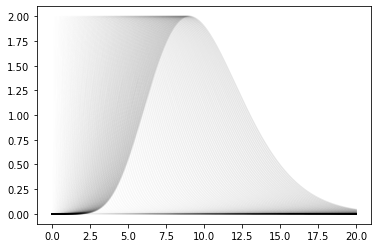

In [114]:
for i in np.arange(1, 0.01, -0.01):
    out = ssms.basic_simulators.gamma_drift(t=t, shape=10, scale=i, c=2)
    plt.plot(t, out, alpha=i / 10, color="black")

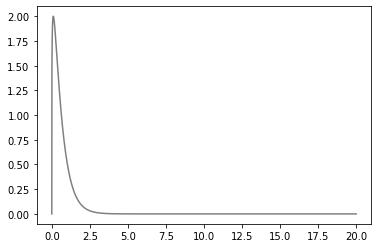

In [126]:
out = ssms.basic_simulators.gamma_drift(t=t, shape=1.2, scale=0.5, c=2)
plt.plot(t, out, alpha=5 / 10, color="black")

In [109]:
out = normalized_gamma(t=t, alpha=10, tau=0.5, c=2)
plt.plot(t, out, alpha=1, color="black")

NameError: name 'normalized_gamma' is not defined

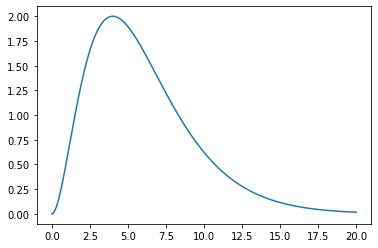

In [43]:
plt.plot(t, out)

In [2]:
np.zeros(100).shape

(100,)

In [110]:
from ssms.basic_simulators import simulator

model = "gamma_drift_angle"
params_tmp = ssms.config.model_config[model]["default_params"]
params_tmp[ssms.config.model_config[model]["params"].index("c")] = 3.0
params_tmp[ssms.config.model_config[model]["params"].index("theta")] = 0.0

sim_out = simulator(model=model, theta=params_tmp, n_samples=10000)

In [111]:
from ssms.basic_simulators import simulator

model = "angle"
params_tmp = ssms.config.model_config[model]["default_params"]

sim_out = simulator(model=model, theta=params_tmp, n_samples=10000)

In [12]:
sim_out["rts"].shape

(10000, 1)

In [7]:
ssms.config.model_config["gamma_drift"]["default_params"]

[0.0, 1.0, 0.5, 0.25, 5.0, 0.5, 1.0]

(array([1.000e+00, 2.000e+00, 4.000e+00, 3.900e+01, 9.600e+01, 2.440e+02,
        4.570e+02, 6.730e+02, 8.610e+02, 2.370e+02, 0.000e+00, 0.000e+00,
        2.800e+01, 6.280e+02, 9.300e+02, 9.120e+02, 9.600e+02, 1.102e+03,
        1.027e+03, 8.510e+02, 5.290e+02, 2.670e+02, 9.800e+01, 3.800e+01,
        9.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-2.27103591, -2.06870387, -1.86637184, -1.6640398 , -1.46170777,
        -1.25937573, -1.0570437 , -0.85471166, -0.65237962, -0.45004759,
        -0.24771555, -0.04538352,  0.15694852,  0.35928055,  0.56161259,
         0.76394463,  0.96627666,  1.1686087 ,  1.37094073,  1.57327277,
         1.7756048 ,  1.97793684,  2.18026888,  2.38260091,  2.58493295,
         2.78726498,  2.98959702,  3.19192905,  3.39426109,  3.59659313,
         3.79892516]),
 <BarContainer object of 30 artists>)

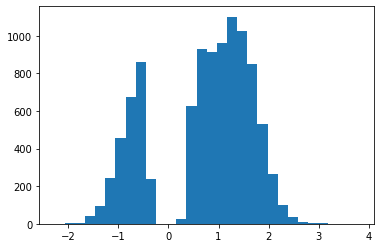

In [26]:
from matplotlib import pyplot as plt

plt.hist(sim_out["rts"] * sim_out["choices"], bins=30)

In [27]:
(sim_out["choices"] == 1).sum() / sim_out["choices"].shape[0]

0.7386

# Test new tradeoff model

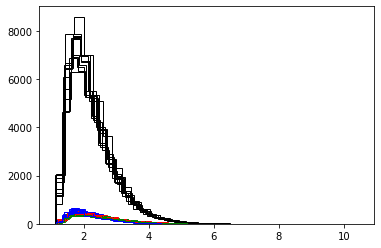

In [106]:
from ssms.basic_simulators import simulator

model = "tradeoff_angle_no_bias"
color_dict = {0: "red", 1: "green", 2: "blue", 3: "black"}

rt_means_by_choice = {i: [] for i in range(4)}

params_tmp = ssms.config.model_config[model]["default_params"]
params_tmp[ssms.config.model_config[model]["params"].index("d")] = 1.0
params_tmp[ssms.config.model_config[model]["params"].index("vh")] = 1.0
params_tmp[ssms.config.model_config[model]["params"].index("vl2")] = 1.0  # 1.0
params_tmp[ssms.config.model_config[model]["params"].index("vl1")] = 0.0
params_tmp[ssms.config.model_config[model]["params"].index("theta")] = 0.0


# params_tmp[ssms.config.model_config[model]['params'].index('theta')] = 0.0
for k in range(10):
    sim_out = simulator(model=model, theta=params_tmp, n_samples=50000)
    for i in np.unique(sim_out["choices"]):
        plt.hist(
            sim_out["rts"][sim_out["choices"] == i],
            histtype="step",
            bins=30,
            color=color_dict[i],
            alpha=1,
        )  # 0.1)
        rt_means_by_choice[i].append(np.mean(sim_out["rts"][sim_out["choices"] == i]))

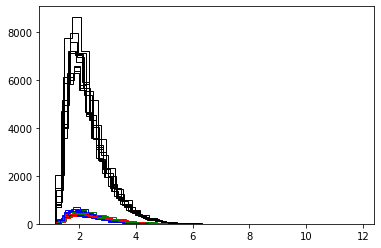

In [107]:
from ssms.basic_simulators import simulator

model = "tradeoff_angle_no_bias"
color_dict = {0: "red", 1: "green", 2: "blue", 3: "black"}

rt_means_by_choice_2 = {i: [] for i in range(4)}
params_tmp = ssms.config.model_config[model]["default_params"]
params_tmp[ssms.config.model_config[model]["params"].index("d")] = 0.0
params_tmp[ssms.config.model_config[model]["params"].index("vh")] = 1.0
params_tmp[ssms.config.model_config[model]["params"].index("vl2")] = 1.0  # 1.0
params_tmp[ssms.config.model_config[model]["params"].index("vl1")] = 0.0
params_tmp[ssms.config.model_config[model]["params"].index("theta")] = 0.0

for k in range(10):
    sim_out = simulator(model=model, theta=params_tmp, n_samples=50000)
    for i in np.unique(sim_out["choices"]):
        plt.hist(
            sim_out["rts"][sim_out["choices"] == i],
            histtype="step",
            bins=30,
            color=color_dict[i],
            alpha=1,
        )
        rt_means_by_choice_2[i].append(np.mean(sim_out["rts"][sim_out["choices"] == i]))

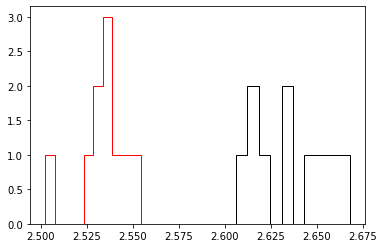

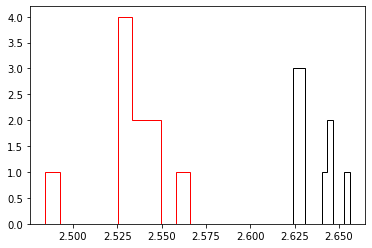

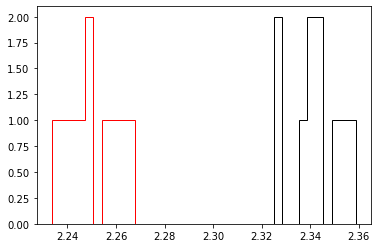

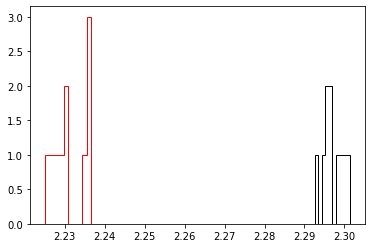

In [108]:
for i in range(4):
    plt.hist(rt_means_by_choice[i], histtype="step", color="red")
    plt.hist(rt_means_by_choice_2[i], histtype="step", color="black")
    plt.show()

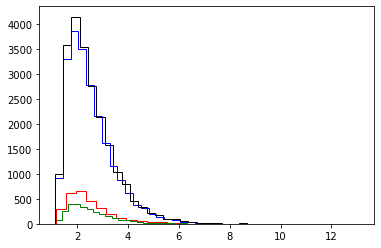

In [66]:
from matplotlib import pyplot as plt


for i in np.unique(sim_out["choices"]):
    plt.hist(
        sim_out["rts"][sim_out["choices"] == i],
        histtype="step",
        bins=30,
        color=color_dict[i],
        alpha=0.5,
    )

In [132]:
np.tile(np.array([0], dtype=np.float32), 10).shape

(10,)